## AI Midterm Project - AIDE300

### **Project Title:** *Intrusion Detection Class Prediction using Different ML Techniques*

### **Project Contributors:**

- **Trương Nam Hạnh** - MSSV: 2113253004 - K60CLC2

- **Nguyễn Thị Thu** - MSSV: 2112253623 - K60CLC2


## Project Description

### Overview
This project focuses on building an intrusion detection system (IDS) using various machine learning techniques. The primary goal is to detect and classify network intrusions by analyzing data patterns from network traffic, utilizing the well-known **NSL-KDD** dataset.

### Objective
The main objective of this project is to develop and evaluate different machine learning models that can effectively identify malicious activities within network traffic and differentiate them from normal activities. The detection system aims to enhance cybersecurity measures by quickly identifying unauthorized access, attacks, and other threats.

### Dataset
The **NSL-KDD dataset**, serves as the basis for training and testing the machine learning models. This dataset includes a variety of network connection features and labels that specify whether a connection is normal or associated with a specific type of attack.

### Approach

1. **Data Preprocessing**: 
   - The dataset is cleaned and necessary transformations are applied to handle categorical variables, missing values, and imbalanced classes.

2. **Feature Selection**: 
   - Key features from the network traffic data are identified for improving model performance.

3. **Modeling**: 
   - Various machine learning algorithms (e.g., Decision Trees, Random Forest, Support Vector Machines, etc.) are implemented to create predictive models for intrusion detection.

4. **Evaluation**: 
   - Models are evaluated using standard metrics such as accuracy, precision, recall, and F1-score to determine their effectiveness in detecting intrusions.

## Environment Setup

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
import os

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


## Load Data

In [ ]:
# datacols = ["duration","protocol_type","service","flag","src_bytes",
#     "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
#     "logged_in","num_compromised","root_shell","su_attempted","num_root",
#     "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
#     "is_host_login","is_guest_login","count","srv_count","serror_rate",
#     "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
#     "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
#     "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
#     "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
#     "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

dfkdd_train = pd.read_table(r"C:\Users\HP\Downloads\Network-Intrusion-Detection-Using-Machine-Learning-Techniques-master\NSL_KDD_dataset\KDDTrain.txt", sep=",", names=datacols)
dfkdd_train = dfkdd_train.iloc[:,:-1]

dfkdd_test = pd.read_table(r"C:\Users\HP\Downloads\Network-Intrusion-Detection-Using-Machine-Learning-Techniques-master\NSL_KDD_dataset\KDDTest.txt", sep=",", names=datacols)
dfkdd_test = dfkdd_test.iloc[:,:-1]

### NSL-KDD Dataset Attributes

The NSL-KDD dataset consists of various attributes for each connection record. Below is a description of each attribute:

- **duration**: Length of the connection in seconds.

- **protocol_type**: Type of protocol used (e.g., TCP, UDP, ICMP).

- **service**: Network service on the destination (e.g., HTTP, FTP, SMTP).

- **flag**: Status flag of the connection (e.g., SF, REJ).

- **src_bytes**: Number of data bytes sent from the source to the destination.

- **dst_bytes**: Number of data bytes sent from the destination to the source.

- **land**: Binary flag indicating if the connection is from/to the same host/port (1 if true, 0 if false).

- **wrong_fragment**: Number of wrong fragments in the connection.

- **urgent**: Number of urgent packets in the connection.

- **hot**: Number of “hot” indicators (e.g., number of login failures).

- **num_failed_logins**: Number of failed login attempts.

- **logged_in**: Binary flag indicating if the login was successful (1 if true, 0 if false).

- **num_compromised**: Number of compromised conditions.

- **root_shell**: Binary flag indicating if a root shell was obtained (1 if true, 0 if false).

- **su_attempted**: Number of “su root” command attempts.

- **num_root**: Number of root accesses.

- **num_file_creations**: Number of file creation operations.

- **num_shells**: Number of shell prompts.

- **num_access_files**: Number of operations on access control files.

- **is_host_login**: Binary flag indicating if the login belongs to the host (1 if true, 0 if false).

- **is_guest_login**: Binary flag indicating if the login is a guest login (1 if true, 0 if false).

- **count**: Number of connections to the same host as the current connection in the past two seconds.

- **srv_count**: Number of connections to the same service as the current connection in the past two seconds.

- **serror_rate**: Percentage of connections that have “SYN” errors.

- **srv_serror_rate**: Percentage of connections that have “SYN” errors for the same service.

- **rerror_rate**: Percentage of connections that have “REJ” errors.

- **srv_rerror_rate**: Percentage of connections that have “REJ” errors for the same service.

- **same_srv_rate**: Percentage of connections to the same service.

- **diff_srv_rate**: Percentage of connections to different services.

- **srv_diff_host_rate**: Percentage of connections to different hosts.

- **dst_host_count**: Number of connections to the same destination host.

- **dst_host_srv_count**: Number of connections to the same service on the destination host.

- **dst_host_same_srv_rate**: Percentage of connections to the same service on the destination host.

- **dst_host_diff_srv_rate**: Percentage of connections to different services on the destination host.

- **dst_host_same_src_port_rate**: Percentage of connections to the same source port on the destination host.

- **dst_host_srv_diff_host_rate**: Percentage of connections to different hosts on the same service.

- **dst_host_serror_rate**: Percentage of connections that have “SYN” errors on the destination host.

- **dst_host_srv_serror_rate**: Percentage of connections that have “SYN” errors on the same service on the destination host.

- **dst_host_rerror_rate**: Percentage of connections that have “REJ” errors on the destination host.

- **dst_host_srv_rerror_rate**: Percentage of connections that have “REJ” errors on the same service on the destination host.

- **attack_class**: Class label indicating whether the connection is normal or an attack, and the type of attack.


### Train dataset

In [53]:
dfkdd_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [54]:
print('Train set dimension: {} rows, {} columns'.format(dfkdd_train.shape[0], dfkdd_train.shape[1]))

Train set dimension: 125973 rows, 42 columns


In [55]:
dfkdd_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The dataset provides a comprehensive statistical overview of various features used for network intrusion detection as indicated by:

- **Duration**: The average connection duration is approximately 287 seconds, with a wide range from 0 to 42,908 seconds, indicating significant variability in connection times.

- **Data Transfer**: 
  - `src_bytes`: Average of 45,566.74 bytes transferred from source to destination, with a high standard deviation of 5,870,331 bytes, indicating large variations in data transfer sizes.
  - `dst_bytes`: Average of 19,779.11 bytes transferred from destination to source, with a standard deviation of 4,021,269 bytes.

- **Login Attempts**:
  - `num_failed_logins`: Rare failed login attempts with a mean of 0.0012.
  - `logged_in`: Successful logins occur in approximately 39.57% of connections.

- **Compromised Conditions**:
  - `num_compromised`: Average of 0.279 compromised conditions per connection, with a maximum of 7,479, highlighting the presence of highly compromised connections.

- **Root Access**:
  - `root_shell`: Root shell access is infrequent with a mean of 0.0013.
  - `su_attempted`: “su root” command attempts are rare with a mean of 0.0011.

- **Connection Counts**:
  - `count`: Average of 84.11 connections to the same host.
  - `srv_count`: Average of 27.74 connections to the same service, indicating repeated connections to the same destinations.

- **Error Rates**:
  - `serror_rate`, `srv_serror_rate`, `rerror_rate`, `srv_rerror_rate`: The percentage of connections with errors is relatively low, suggesting that most connections do not encounter errors.

- **Host and Service Rates**:
  - `dst_host_count`: Average of 182.15 connections to the same destination host.
  - `dst_host_srv_count`: Average of 115.65 connections to the same service on the destination host.
  - `dst_host_same_srv_rate`: Mean of 0.521 for the percentage of connections to the same service on the destination host.
  - `dst_host_diff_srv_rate`: Mean of 0.083 for the percentage of connections to different services on the destination host.

### Test dataset

In [56]:
print('Test set dimension: {} rows, {} columns'.format(dfkdd_test.shape[0], dfkdd_test.shape[1]))

Test set dimension: 22544 rows, 42 columns


## Data Preprocessing

### Attack Class Mapping in NSL-KDD Dataset

The NSL-KDD dataset includes 42 attributes for each connection record, one of which is the class label that represents attack types. These attack types are categorized into four distinct classes as detailed by Mahbod Tavallaee et al. in [_A Detailed Analysis of the KDD CUP 99 Data Set_](http://www.ee.ryerson.ca/~bagheri/papers/cisda.pdf) paper. The classes are as follows:

1. **Denial of Service (DoS)**: 
   - **Description**: An attack in which an adversary sends a massive amount of traffic requests to a system, overwhelming its resources and rendering it unable to handle legitimate requests. This results in legitimate users being denied access to the machine.

2. **Probing Attack (Probe)**: 
   - **Description**: An attack where an adversary probes a network of computers to collect information that could be used to compromise its security controls.

3. **User to Root Attack (U2R)**: 
   - **Description**: A type of exploit where an attacker gains initial access to a system as a normal user and then exploits vulnerabilities to elevate their privileges to root access.

4. **Remote to Local Attack (R2L)**: 
   - **Description**: An attack where an attacker sends packets to a machine over a network, despite not having an account on that machine, and exploits vulnerabilities to gain local user access.

Each attack class represents a different type of threat with unique characteristics and methods of exploitation.

In [57]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

In [58]:
dfkdd_train['attack_class'] = dfkdd_train['attack'].apply(lambda v: mapping[v])
dfkdd_test['attack_class'] = dfkdd_test['attack'].apply(lambda v: mapping[v])

In [59]:
dfkdd_train.drop(['attack'], axis=1, inplace=True)
dfkdd_test.drop(['attack'], axis=1, inplace=True)

In [60]:
dfkdd_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


### Exploratory Data Analysis

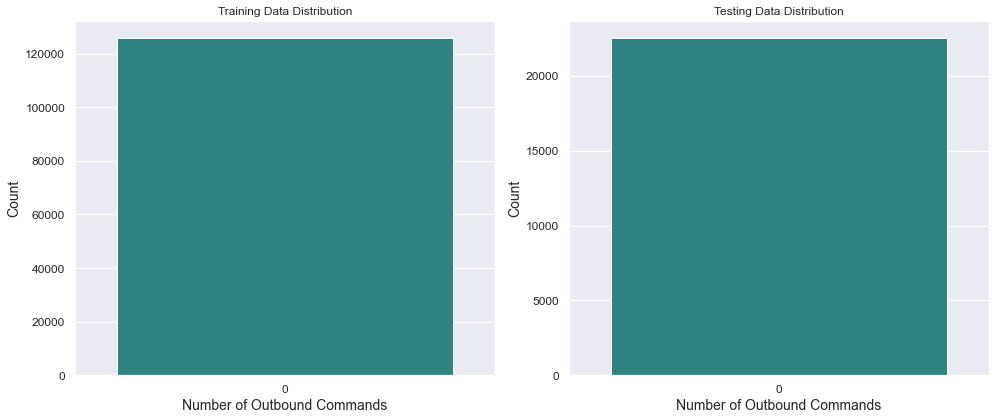

In [61]:
train_counts = dfkdd_train['num_outbound_cmds'].value_counts()
test_counts = dfkdd_test['num_outbound_cmds'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.barplot(x=train_counts.index, y=train_counts.values, ax=axes[0], palette='viridis')
axes[0].set_title('Training Data Distribution')
axes[0].set_xlabel('Number of Outbound Commands')
axes[0].set_ylabel('Count')

sns.barplot(x=test_counts.index, y=test_counts.values, ax=axes[1], palette='viridis')
axes[1].set_title('Testing Data Distribution')
axes[1].set_xlabel('Number of Outbound Commands')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

The `num_outbound_cmds` field contains only 0 values across all records. Since it provides no useful information and is redundant, it will be removed from both the training and test datasets.

In [62]:
dfkdd_train.drop(['num_outbound_cmds'], axis=1, inplace=True)
dfkdd_test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [72]:
attack_class_freq_train = dfkdd_train[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_test = dfkdd_test[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()), 2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()), 2)

attack_class_dist = pd.concat([attack_class_freq_train, attack_class_freq_test], axis=1)
attack_class_dist.columns = ['train_count', 'train_percent', 'test_count', 'test_percent']
attack_class_dist

,train_count,train_percent,test_count,test_percent
attack_class,,,,
Normal,67343,53.46,9711,43.08
DoS,45927,36.46,7458,33.08
Probe,11656,9.25,2421,10.74
R2L,995,0.79,2754,12.22
U2R,52,0.04,200,0.89


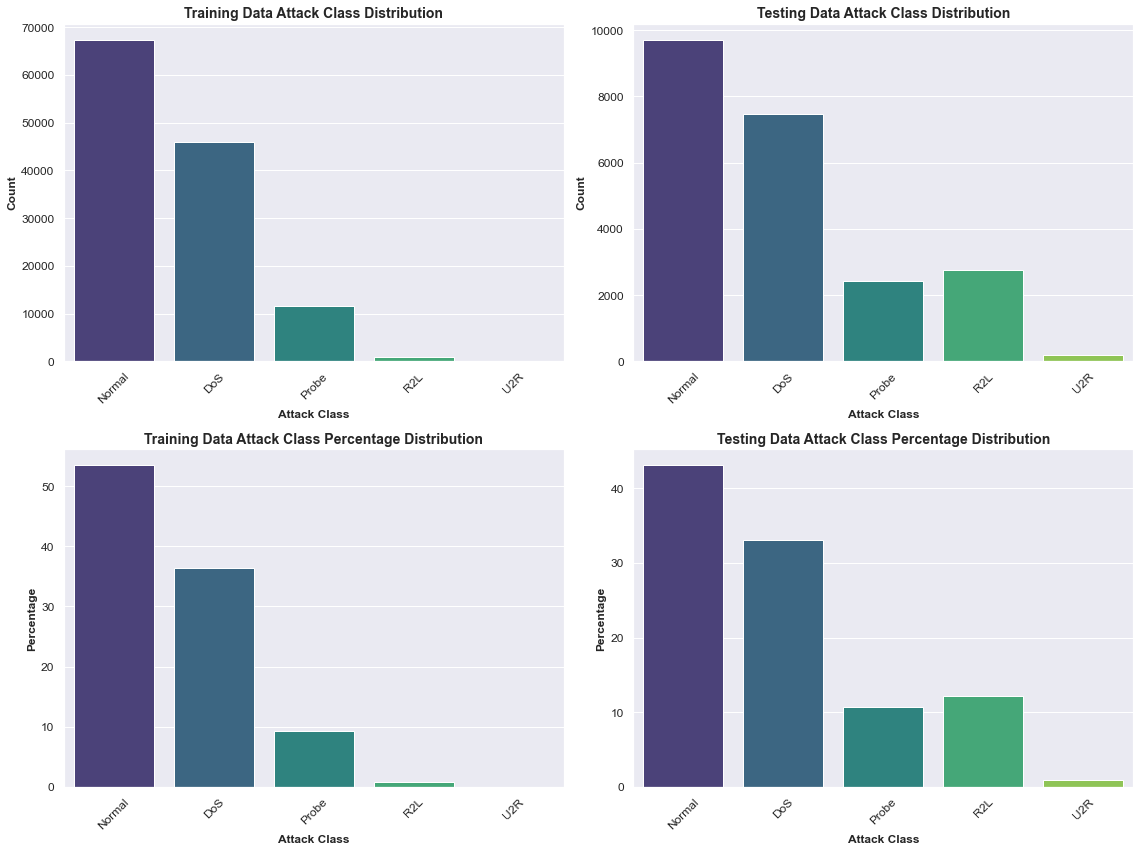

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.barplot(ax=axes[0, 0], x=attack_class_dist.index, y=attack_class_dist['train_count'], palette='viridis')
axes[0, 0].set_title('Training Data Attack Class Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Attack Class', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[0, 1], x=attack_class_dist.index, y=attack_class_dist['test_count'], palette='viridis')
axes[0, 1].set_title('Testing Data Attack Class Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Attack Class', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Count', fontsize=12, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[1, 0], x=attack_class_dist.index, y=attack_class_dist['train_percent'], palette='viridis')
axes[1, 0].set_title('Training Data Attack Class Percentage Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Attack Class', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Percentage', fontsize=12, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.barplot(ax=axes[1, 1], x=attack_class_dist.index, y=attack_class_dist['test_percent'], palette='viridis')
axes[1, 1].set_title('Testing Data Attack Class Percentage Distribution', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Attack Class', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Percentage', fontsize=12, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

- The top two graphs show the count of instances for each attack class, while the bottom two graphs show the percentage distribution. In the training dataset, the **‘Normal’** class is the most prevalent, followed by **‘DoS’**, **‘Probe’**, **‘R2L’**, and **‘U2R’**. 

- The testing dataset shows a similar pattern, but with a higher percentage of **‘R2L’** and **‘U2R’** attacks compared to the training dataset. This indicates an **imbalance** in the distribution of attack classes, with **‘Normal’** and **‘DoS’** being the dominant classes in both datasets. 

- This imbalance could affect the performance of machine learning models, as they may become **biased** towards the dominant classes.

In [76]:
attack_class_dist

,train_count,train_percent,test_count,test_percent
attack_class,,,,
Normal,67343,53.46,9711,43.08
DoS,45927,36.46,7458,33.08
Probe,11656,9.25,2421,10.74
R2L,995,0.79,2754,12.22
U2R,52,0.04,200,0.89


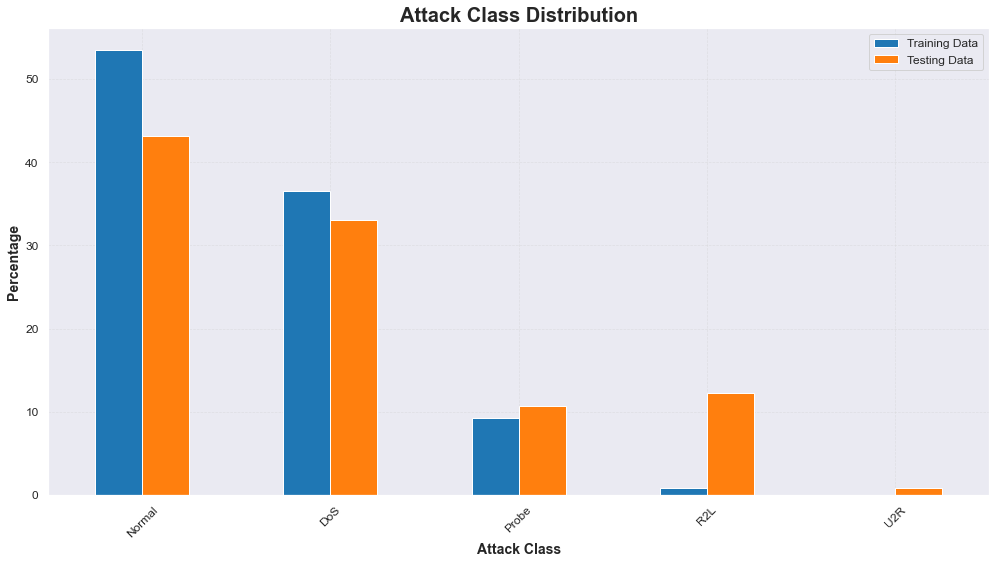

In [79]:
plot = attack_class_dist[['train_percent', 'test_percent']].plot(kind="bar", figsize=(14, 8), color=['#1f77b4', '#ff7f0e'])

plot.set_title("Attack Class Distribution", fontsize=20, fontweight='bold')
plot.set_xlabel("Attack Class", fontsize=14, fontweight='bold')
plot.set_ylabel("Percentage", fontsize=14, fontweight='bold')

plot.tick_params(axis='x', rotation=45, labelsize=12)
plot.tick_params(axis='y', labelsize=12)

plot.grid(color='lightgray', alpha=0.5, linestyle='--', linewidth=0.7)
plot.legend(["Training Data", "Testing Data"], fontsize=12, loc='upper right')

plt.tight_layout()
plt.show()

- The attack classes include **‘Normal’**, **‘DoS’**, **‘Probe’**, **‘R2L’**, and **‘U2R’**. The **‘Normal’** class is the most prevalent in both datasets, accounting for just above **50%** in the training data and approximately **40%** in the testing data. The **‘DoS’** class follows closely, with around **40%** in the training data and slightly lower in the testing data. 

- The **‘Probe’** class shows a higher percentage in the training data (about **20%**) compared to the testing data (around **10%**). The **‘R2L’** and **‘U2R’** classes have relatively small percentages in both datasets, with the training data showing around **5%** and the testing data even lower.

- The **imbalance** in the distribution of attack classes, with **‘Normal’** and **‘DoS’** being the dominant classes. This imbalance could impact the performance of machine learning models trained on this data.

In [20]:
dfkdd_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


### Scaling Numerical Attributes

We scaled numerical attributes is essential to improve model performance, especially for algorithms that are sensitive to the scale of input data

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols = dfkdd_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(dfkdd_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(dfkdd_test.select_dtypes(include=['float64','int64']))

sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

### Encoding of Categorical Attributes

- Encoding categorical attributes is important because most machine learning algorithms work with numerical data, and categorical variables, which represent in our data in text form, cannot be directly understood by these algorithms. By converting categories into numerical values, we enable the models to process and learn from them effectively.
- We used **Label Encoder** as a straightforward way to convert categorical variables into numerical form by assigning a unique integer to each category

In [81]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cattrain = dfkdd_train.select_dtypes(include=['object']).copy()
cattest = dfkdd_test.select_dtypes(include=['object']).copy()

traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

enctrain = traincat.drop(['attack_class'], axis=1)
enctest = testcat.drop(['attack_class'], axis=1)

cat_Ytrain = traincat[['attack_class']].copy()
cat_Ytest = testcat[['attack_class']].copy()

### Data Sampling (Oversampling for unbalanced data)

In [82]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

sc_traindf = dfkdd_train.select_dtypes(include=['float64', 'int64'])
refclasscol = pd.concat([sc_traindf, enctrain], axis=1).columns
refclass = np.concatenate((sc_train, enctrain.values), axis=1)
X = refclass

c, r = cat_Ytest.values.shape
y_test = cat_Ytest.values.reshape(c,)

c, r = cat_Ytrain.values.shape
y = cat_Ytrain.values.reshape(c,)

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 67343, 0: 45927, 2: 11656, 3: 995, 4: 52})
Resampled dataset shape Counter({1: 67343, 0: 67343, 3: 67343, 2: 67343, 4: 67343})


### Feature Selection

We used RandomForestClassifier as a base model for feature selection because it excels at identifying the most important features in our dataset. Its built-in feature importance scores are valuable for pinpointing which features have the greatest impact on the model's predictions.

<Figure size 1152x576 with 0 Axes>

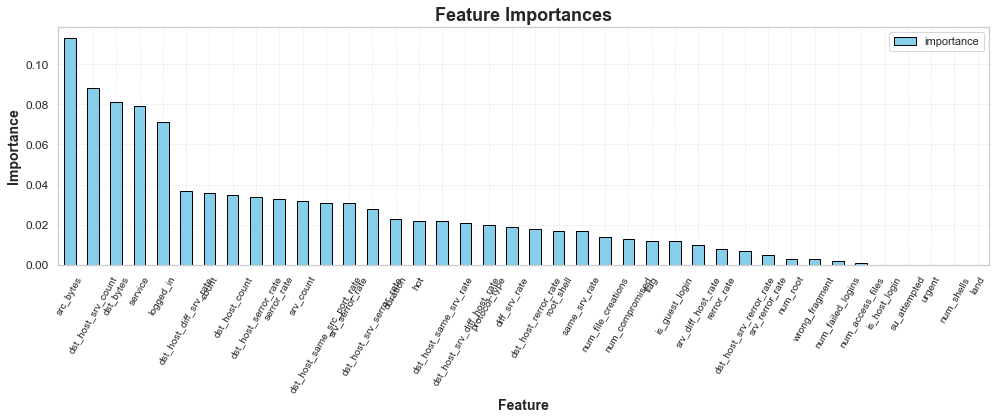

In [86]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_res, y_res)

score = np.round(rfc.feature_importances_, 3)
importances = pd.DataFrame({'feature': refclasscol, 'importance': score})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

plot = importances.plot(kind='bar', color='skyblue', edgecolor='black')
plot.set_title("Feature Importances", fontsize=18, fontweight='bold')
plot.set_xlabel("Feature", fontsize=14, fontweight='bold')
plot.set_ylabel("Importance", fontsize=14, fontweight='bold')
plot.tick_params(axis='x', rotation=60, labelsize=10)
plot.tick_params(axis='y', labelsize=12)
plot.grid(color='lightgray', alpha=0.5, linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

The most important features are:

1. **`src_bytes`**: This feature has the highest importance score, indicating it contributes significantly to the model’s predictions.
2. **`dst_bytes`**: Following closely, this feature is also crucial for the model.
3. **`service`**: This feature ranks high, highlighting its relevance in the prediction process.
4. **`logged_in`**: This feature is important, reflecting its impact on the model.
5. **`dst_host_srv_count`**: This feature also contributes notably to the model’s performance.

In contrast, the following features have lower importance scores and thus have less impact on the model’s performance:

- **`num_failed_logins`**
- **`num_access_files`**
- **`su_attempted`**

These features have been deemed less critical based on their importance scores and contribute less to the model's overall predictive power.

### Feature Selection Using Recursive Feature Elimination (RFE)

We use Recursive Feature Elimination (RFE) with a RandomForestClassifier to systematically identify the most important features in our dataset. The process involves the following steps:

1. **Initialization**: 
   - We initialize the `RandomForestClassifier` and the `RFE` object, specifying the number of features to retain (`n_features_to_select=10`).

2. **Fitting the Model**: 
   - We fit the `RFE` model on the dataset (`X_res`, `y_res`). RFE evaluates the importance of each feature and recursively removes the least important ones.

3. **Progress Monitoring**: 
   - Using `tqdm`, we track the progress of the feature selection process, which provides a visual indicator of how many features have been processed.

4. **Feature Mapping and Selection**: 
   - After fitting the model, we create a map of features based on their support status (whether they were selected) and retrieve the list of features deemed important by RFE.

5. **Output**: 
   - Finally, we print the selected features to identify which ones are most relevant for the model.

In [87]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import itertools
from tqdm import tqdm
import pandas as pd

rfc = RandomForestClassifier()
rfe = RFE(rfc, n_features_to_select=10)

rfe.fit(X_res, y_res)

with tqdm(total=len(rfe.support_), desc='Feature Selection Progress') as pbar:
    for i in range(len(rfe.support_)):
        pbar.update(1)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), refclasscol)]
selected_features = [v for i, v in feature_map if i]

print(f"Selected Features: {selected_features}")


Feature Selection Progress: 100%|██████████| 40/40 [00:00<?, ?it/s]

Selected Features: ['src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_serror_rate', 'service']


### Dataset  Partition (Train - Test)

In [88]:
newcol = list(refclasscol)
newcol.append('attack_class')

new_y_res = y_res[:, np.newaxis]

res_arr = np.concatenate((X_res, new_y_res), axis=1)
res_df = pd.DataFrame(res_arr, columns = newcol) 

reftest = pd.concat([sc_testdf, testcat], axis=1)
reftest['attack_class'] = reftest['attack_class'].astype(np.float64)
reftest['protocol_type'] = reftest['protocol_type'].astype(np.float64)
reftest['flag'] = reftest['flag'].astype(np.float64)
reftest['service'] = reftest['service'].astype(np.float64)

print(f"Train data shape: {res_df.shape}")
print(f"Test data shape: {reftest.shape}")

Train data shape: (336715, 41)
Test data shape: (22544, 41)


- We use this function to subdivide the dataset into two-class attack labels for the purpose of creating training and test subsets that focus on different combinations of normal and attack classes. 

- The function `create_classdict()` is designed to organize and categorize data into different classes based on attack types and the normal class for machine learning tasks. Specifically, it creates subsets of data for both training and testing phases, each corresponding to a unique combination of normal and attack classes.

In [89]:
from collections import defaultdict
classdict = defaultdict(list)

attacklist = [('DoS', 0.0), ('Probe', 2.0), ('R2L', 3.0), ('U2R', 4.0)]
normalclass = [('Normal', 1.0)]

def create_classdict():
    '''This function subdivides train and test dataset into two-class attack labels''' 
    for j, k in normalclass: 
        for i, v in attacklist: 
            restrain_set = res_df.loc[(res_df['attack_class'] == k) | (res_df['attack_class'] == v)]
            classdict[j +'_' + i].append(restrain_set)
            # test labels
            reftest_set = reftest.loc[(reftest['attack_class'] == k) | (reftest['attack_class'] == v)]
            classdict[j +'_' + i].append(reftest_set)
        
create_classdict()

In [90]:
for k, v in classdict.items():
    print(f"{k} shape: {v[0].shape}, {k} shape: {v[1].shape}")

Normal_DoS shape: (134686, 41), Normal_DoS shape: (17169, 41)
Normal_Probe shape: (134686, 41), Normal_Probe shape: (12132, 41)
Normal_R2L shape: (134686, 41), Normal_R2L shape: (12465, 41)
Normal_U2R shape: (134686, 41), Normal_U2R shape: (9911, 41)


By assigning `pretrain` and `pretest` to the training and test subsets, respectively, we ensure that we are working with the appropriate data for this specific attack scenario.

In [91]:
pretrain = classdict['Normal_DoS'][0]
pretest = classdict['Normal_DoS'][1]
grpclass = 'Normal_DoS'

### Finalize data preprocessing for training

In [93]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc = OneHotEncoder(handle_unknown='ignore')

Xresdf = pretrain 
newtest = pretest

Xresdfnew = Xresdf[selected_features]
Xresdfnum = Xresdfnew.drop(['service'], axis=1)
Xresdfcat = Xresdfnew[['service']].copy()

Xtest_features = newtest[selected_features]
Xtestdfnum = Xtest_features.drop(['service'], axis=1)
Xtestcat = Xtest_features[['service']].copy()

enc.fit(Xresdfcat)

X_train_1hotenc = enc.transform(Xresdfcat).toarray()
X_test_1hotenc = enc.transform(Xtestcat).toarray()

X_train = np.concatenate((Xresdfnum.values, X_train_1hotenc), axis=1)
X_test = np.concatenate((Xtestdfnum.values, X_test_1hotenc), axis=1) 

y_train = Xresdf[['attack_class']].copy()
c, r = y_train.values.shape
Y_train = y_train.values.reshape(c,)

y_test = newtest[['attack_class']].copy()
c, r = y_test.values.shape
Y_test = y_test.values.reshape(c,)

## Train Models

- We train multiple models to leverage the strengths of different algorithms and enhance our overall predictive performance. Each model has unique characteristics that may capture different patterns in the data, leading to improved accuracy and robustness. We can mitigate the risk of overfitting to any single model and better handle the complexities of the dataset.

- Additionally, combining models through techniques like voting allows us to aggregate their predictions, which often results in a more accurate and stable outcome.


In [94]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

models = {
    'KNeighborsClassifier': KNeighborsClassifier(n_jobs=-1),
    'LogisticRegression': LogisticRegression(n_jobs=-1, random_state=0),
    'BernoulliNB': BernoulliNB(),
    'DecisionTreeClassifier': tree.DecisionTreeClassifier(criterion='entropy', random_state=0),
    'SVC': SVC(random_state=0),
    'RandomForestClassifier': RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Trained {name}")

combined_model = [
    ('BernoulliNB', models['BernoulliNB']),
    ('DecisionTreeClassifier', models['DecisionTreeClassifier']),
    ('KNeighborsClassifier', models['KNeighborsClassifier']),
    ('LogisticRegression', models['LogisticRegression'])
]

voting_clf = VotingClassifier(estimators=combined_model, voting='soft', n_jobs=-1)
voting_clf.fit(X_train, y_train)
print("Trained VotingClassifier")


Trained KNeighborsClassifier
Trained LogisticRegression
Trained BernoulliNB
Trained DecisionTreeClassifier
Trained SVC
Trained RandomForestClassifier
Trained VotingClassifier


## Select Best Model

In [96]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    model.fit(X_train, y_train)

best_model = None
best_score = 0

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=3)
    y_pred = model.predict(X_train)
    
    accuracy = metrics.accuracy_score(y_train, y_pred)
    confusion_matrix = metrics.confusion_matrix(y_train, y_pred)
    classification_report = metrics.classification_report(y_train, y_pred)
    
    print(f"\n============================== {grpclass} {name} Model Evaluation ==============================")
    print(f"Cross Validation Mean Score: {scores.mean()}")
    print(f"Model Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion_matrix}")
    print(f"Classification Report:\n{classification_report}")
    
    if scores.mean() > best_score:
        best_score = scores.mean()
        best_model = (name, model)

print(f"\n============================== Best Model ==============================")
print(f"Best Model: {best_model[0]}")
print(f"Cross Validation Mean Score: {best_score}")


============================== Normal_DoS KNeighborsClassifier Model Evaluation ==============================
Cross Validation Mean Score: 0.996027801902864
Model Accuracy: 0.9977577476500898
Confusion Matrix:
[[67287    56]
 [  246 67097]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67343
         1.0       1.00      1.00      1.00     67343

    accuracy                           1.00    134686
   macro avg       1.00      1.00      1.00    134686
weighted avg       1.00      1.00      1.00    134686


============================== Normal_DoS LogisticRegression Model Evaluation ==============================
Cross Validation Mean Score: 0.9807478170137544
Model Accuracy: 0.9808443342292443
Confusion Matrix:
[[65532  1811]
 [  769 66574]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     67343
         1.0       0.97      0.99

The best baseline model is ***RandomForestClassifier***.

## Hypeparameters Tuning and Predict on Testing Set

In [97]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 16)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 16)
    
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print('Best hyperparameters: ', study.best_params)

best_model = RandomForestClassifier(**study.best_params)
best_model.fit(X_train, y_train)

accuracy = metrics.accuracy_score(y_test, best_model.predict(X_test))
confusion_matrix = metrics.confusion_matrix(y_test, best_model.predict(X_test))
classification = metrics.classification_report(y_test, best_model.predict(X_test))

print()
print('============================== Best Model Evaluation ==============================')
print()
print("Model Accuracy:\n", accuracy)
print()
print("Confusion matrix:\n", confusion_matrix)
print()
print("Classification report:\n", classification)
print()

[I 2024-09-20 03:59:34,483] A new study created in memory with name: no-name-38e4d38c-43d3-433f-b4e7-b67cd0aa8df0
[I 2024-09-20 03:59:59,182] Trial 0 finished with value: 0.999406027080267 and parameters: {'n_estimators': 158, 'max_depth': 28, 'min_samples_split': 10, 'min_samples_leaf': 12}. Best is trial 0 with value: 0.999406027080267.
[I 2024-09-20 04:00:05,035] Trial 1 finished with value: 0.9835172179887227 and parameters: {'n_estimators': 85, 'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.999406027080267.
[I 2024-09-20 04:00:12,347] Trial 2 finished with value: 0.9766642580278457 and parameters: {'n_estimators': 110, 'max_depth': 2, 'min_samples_split': 15, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.999406027080267.
[I 2024-09-20 04:00:25,092] Trial 3 finished with value: 0.9997327124672598 and parameters: {'n_estimators': 77, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 3 with value: 0.

Best hyperparameters:  {'n_estimators': 93, 'max_depth': 29, 'min_samples_split': 14, 'min_samples_leaf': 1}

============================== Best Model Evaluation ==============================

Model Accuracy:
 0.8448366241481741

Confusion matrix:
 [[5461 1997]
 [ 667 9044]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.89      0.73      0.80      7458
         1.0       0.82      0.93      0.87      9711

    accuracy                           0.84     17169
   macro avg       0.86      0.83      0.84     17169
weighted avg       0.85      0.84      0.84     17169




The model demonstrates high precision for both classes, particularly for Class 1, where it achieves perfect precision. However, the recall for Class 0 is lower, indicating that the model misses a significant number of Class 0 instances. The overall accuracy is 84%, and the F1-scores for both classes are reasonably high, suggesting a balanced performance. The weighted average metrics further confirm the model’s effectiveness across the entire dataset.

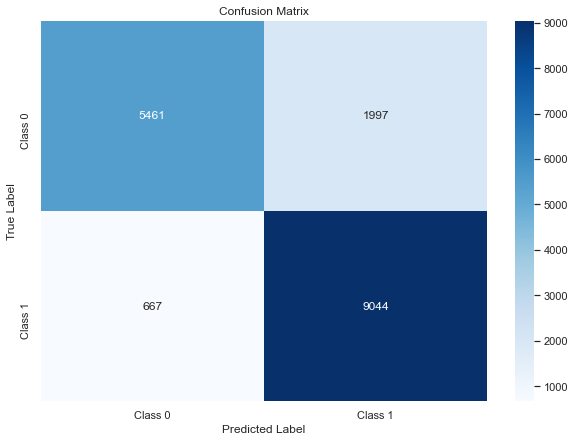

In [98]:
conf_matrix = metrics.confusion_matrix(y_test, best_model.predict(X_test))

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The model’s performance, as indicated by the confusion matrix and classification report, shows a strong ability to correctly identify instances of Class 1, with a perfect precision of 1.00 and a high recall of 0.82. This suggests that the model is highly effective in minimizing false positives for Class 1. However, the recall for Class 0 is lower at 0.73, indicating that the model misses a significant number of Class 0 instances, leading to a higher number of false negatives. The overall accuracy of 0.84 and balanced F1-scores for both classes demonstrate that the model performs well in general, but there is room for improvement in detecting Class 0 instances.